# Matplotlib Cheatsheet

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib

**Which Matplotlib API to use?**
There are two ways to use Matplotlib
1. The first (and most common) way is not pythonic. It relies on global functions to build and display a global figure using matplotlib as a global state machine.
2. The second way is pythonic and object oriented. You obtain an empty Figure from a global factory, and then build the plot explicitly using the methods of the Figure and the classes it contains. (This is the best approach for programmatic use.)

## Basics

**The Figure**

Figure is the top-level container for everything on a canvas. It was obtained from the global Figure factory

```python
fig = plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None)
```
- num: integer or string identifier of figure, if num exists, it is selected else a new one is allocated
- figsize: tuple of (width, height) in inches
- dpi: dots per inch
- facecolor: background color
- edgecolor: border

**Iterating over the open figures
```python
for i in plt.get_fignums():
    fig = plt.figure(i) 
    print(fig.number)
```

**Close a figure**
```python
plt.close(fig.number) # close figure
plt.close()           # close the current figure
plt.close(i)          # close figure numbered i
plt.close(name)       # close figure by name
plt.close('all')      # close all figures
```

**An Axes or Subplot (a subclass of Axes)**
An Axes is a contained class for a specific plot. A figure may contain many Axes and/or Subplots. Subplots are laid out in a grid within the Figure. Axes can be placed anywhere on the Figure. There are a number of methods that yield an Axes, including
```python
ax = fig.add_subplot(2,2,1) # row-col-num
ax= fig.add_axes([0.1,0.1,0.8,0.8])
```

**All at once**
We can use the subplots factory to get the Figure and all the desired Axes at once
```python
fig, ax = plt.subplots() # ax is a list if multiple axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,4)) 
```

**Iterating the Axes within a Figure**
```python
for ax in fig.get_axes():
    pass # do something
```

**Remove an Axes from a Figure**
```python
fig.delaxes(ax
```


# Line Plots - using ax.plot()
## Single Plot

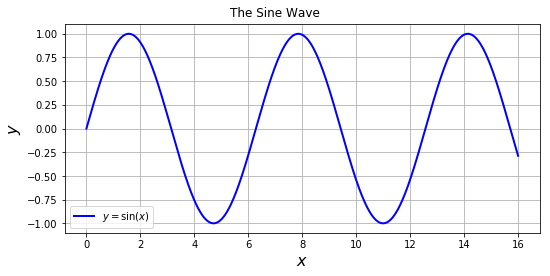

In [72]:
x = np.linspace(0, 16, 800)
y = np.sin(x)
fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(1,1,1) # row-col-num
ax.plot(x, y, 'b-', linewidth=2, label=r'$y=\sin(x)$')
ax.set_ylabel(r'$y$', fontsize=16)
ax.set_xlabel(r'$x$', fontsize=16)
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('The Sine Wave')
fig.tight_layout(pad=2)
fig.savefig('sine_wave.png',dpi=125)

## Multiple lines with markers on a line plot

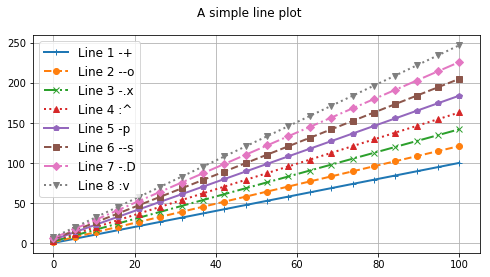

In [73]:
fig, ax = plt.subplots(figsize=(8,4))
N = 8
styles = ['-','--','-.',':']
markers = list('+ox^psDv')
x = np.linspace(0, 100, 20)
for i in range(N): #add line-by-line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y, label='Line ' + str(i+1) + ' ' + s + m, marker=m, linewidth=2, linestyle=s)
ax.grid(True)
ax.legend(loc='best',prop={'size':'large'})
fig.suptitle('A simple line plot')
fig.savefig('line_plot.png',dpi=125)

# Scatter plots - using ax.scatter()
## simple scatter plot

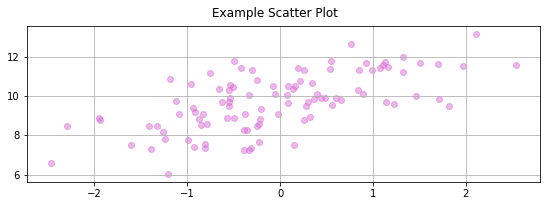

In [74]:
x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2)
ax.grid(True)
fig.savefig('scatter_plot.png',dpi=125)

## Add a regression line (using statsmodels)

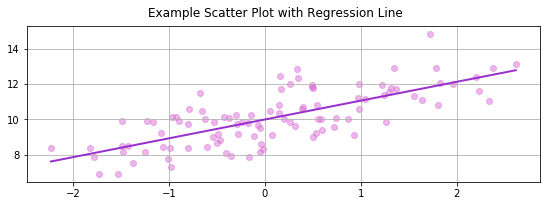

In [75]:
import statsmodels.api as sm

x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot with Regression Line')
fig.tight_layout(pad=2)
ax.grid(True)

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model   = sm.OLS(y, x)
fitted  = model.fit()
x_pred  = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred  = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)
fig.savefig('regression_model.png',dpi=125)

## Add confidence bands for the regression line

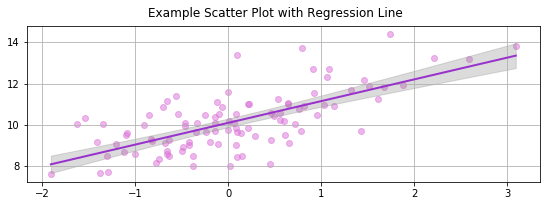

In [76]:
import statsmodels.api as sm
from scipy import stats

x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot with Regression Line')
fig.tight_layout(pad=2)
ax.grid(True)

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model   = sm.OLS(y, x)
fitted  = model.fit()
x_pred  = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred  = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

y_hat = fitted.predict(x)
y_err = y - y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model - 1
t = stats.t.ppf(1-0.025, df=dof) # 2-tail
s_err = np.sum(np.power(y_err,2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((x_pred - mean_x),2) / (np.sum(np.power(x_pred,2))))))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.3)
fig.savefig('confidence_bands.png',dpi=125)

## Add a prediction interval for the regression line

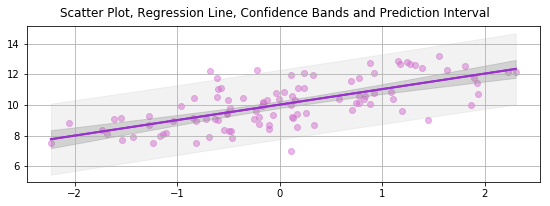

In [77]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
from scipy import stats

x = np.random.randn(100)
y = x + np.random.randn(100) + 10
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Scatter Plot, Regression Line, Confidence Bands and Prediction Interval')
fig.tight_layout(pad=2)
ax.grid(True)

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model   = sm.OLS(y, x)
fitted  = model.fit()
x_pred  = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred  = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

y_hat = fitted.predict(x)
y_err = y - y_hat
mean_x = x.T[1].mean()
n = len(x)
dof = n - fitted.df_model - 1
t = stats.t.ppf(1-0.025, df=dof) # 2-tail
s_err = np.sum(np.power(y_err,2))
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((x_pred - mean_x),2) / (np.sum(np.power(x_pred,2))))))
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
ax.fill_between(x_pred, lower, upper, color='#888888', alpha=0.3)

x = sm.add_constant(x) # intercept
# Model: y ~ x + c
model   = sm.OLS(y, x)
fitted  = model.fit()
x_pred  = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred  = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

sdev, lower, upper = wls_prediction_std(fitted, exog=x_pred2, alpha=0.05)
ax.fill_between(x_pred, lower, upper, color='#888888',alpha=0.1)
fig.savefig('prediction_interval.png',dpi=125)

## Changing the marker size and colour

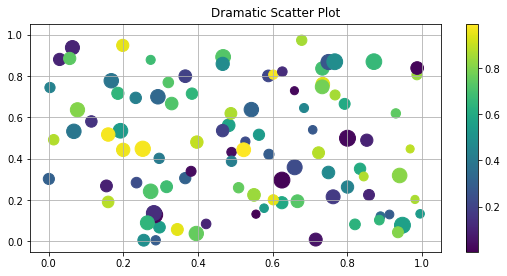

In [78]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
size = ((np.random.rand(N) + 1) * 8) ** 2
colours = np.random.rand(N)
fig, ax = plt.subplots(figsize=(8,4))
l = ax.scatter(x, y, s=size, c=colours)
fig.colorbar(l)
ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
fig.suptitle('Dramatic Scatter Plot')
fig.tight_layout(pad=2)
ax.grid(True)
fig.savefig('marker_sizes_colours.png',dpi=125)

**Note:** Matplotlib has a huge rande of colour maps in addition to the default used here

## Changing the marker symbol

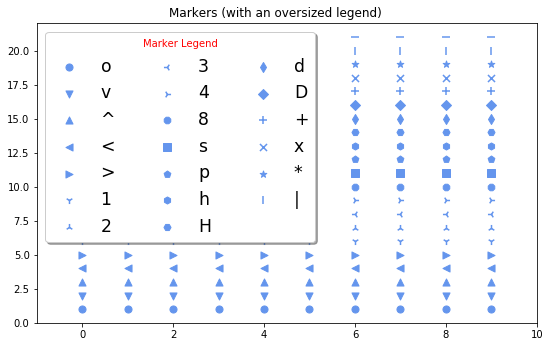

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
markers = list('ov^<>12348sphHdD+x*|_')
N = 10
for i, m in enumerate(markers):
    x = np.arange(N)
    y = np.repeat(i+1, N)
    ax.scatter(x, y, marker=m, label=m, s=50, c='cornflowerblue')
ax.set_xlim((-1,N))
ax.set_ylim((0,len(markers)+1))
ax.legend(loc='upper left', ncol=3, prop={'size':'xx-large'}, shadow=True, title='Marker Legend')
ax.get_legend().get_title().set_color('red')
fig.suptitle('Markers (with an oversized legend)')
fig.tight_layout(pad=2)
fig.savefig('markers.png', dpi=125)

# Bar plots - using ax.bar() and ax.barh()
## Simple bar chart

The bars in a bar-plot are placed to the right of the bar x-axis location by default. Centred labels require a little jiggling with the bar and label positions.

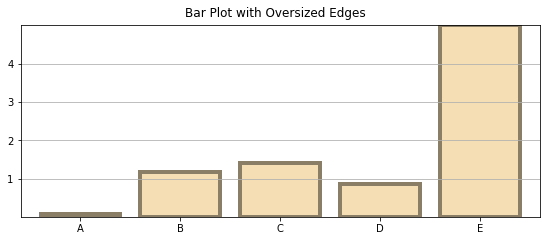

In [80]:
N = 5
labels = list('ABCDEFGHIJKLM'[0:N])
data = np.array(range(N)) + np.random.randn(N)
fig, ax= plt.subplots(figsize=(8,3.5))
width = 0.8
tickLocations = np.arange(N)
rectLocations = tickLocations
ax.bar(rectLocations, data, width, color='wheat',edgecolor='#8B7E66', linewidth=4.0)
# pretty up the plot
ax.set_xticks(ticks=tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6)
ax.set_yticks(range(N)[1:])
ax.set_ylim((0,N))
ax.yaxis.grid(True)
fig.suptitle('Bar Plot with Oversized Edges')
fig.tight_layout(pad=2)
fig.savefig('bar_plot.png',dpi=125)

## Side by side bar chart

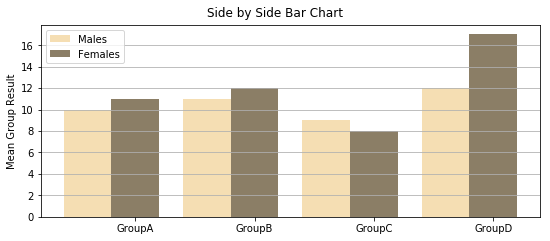

In [101]:
before  = np.array([10, 11, 9, 12])
after   = np.array([11, 12, 8, 17])
labels  = ['Group' + x for x in list('ABCD')]
fig, ax = plt.subplots(figsize=(8,3.5))
width   = 0.4 # bar width
xlocs   = np.arange(len(before))
ax.bar(xlocs - width, before, width, color='wheat', label='Males')
ax.bar(xlocs, after, width, color='#8B7E66', label='Females')
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Mean Group Result')
fig.suptitle('Side by Side Bar Chart')
fig.tight_layout(pad=2)
fig.savefig('sidebyside_bar_chart.png',dpi=125)

## Stacked bar

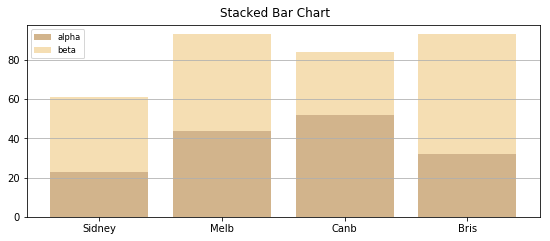

In [96]:
alphas = np.array([23, 44, 52, 32])
betas  = np.array([38, 49, 32, 61])
labels =  ['Sidney', 'Melb', 'Canb', 'Bris']
fig, ax = plt.subplots(figsize=(8,3.5))
width = 0.8
xlocations = np.array(range(len(alphas)+2))
adjlocs = xlocations[1:-1] #- width/2.0
ax.bar(adjlocs, alphas, width, label='alpha', color='tan')
ax.bar(adjlocs, betas, width, label='beta', color='wheat', bottom=alphas)
ax.set_xticks(ticks=xlocations[1:-1])
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best', prop={'size':'small'})
fig.suptitle('Stacked Bar Chart')
fig.tight_layout(pad=2)
fig.savefig('stacked_bar.png',dpi=125)

## Horizontal bar charts

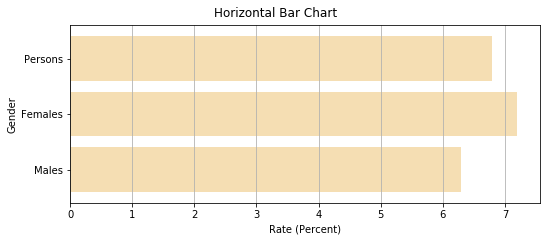

In [97]:
labels = ['Males', 'Females', 'Persons']
data = [6.3, 7.2, 6.8]
width = 0.8
yTickPos = np.arange(len(data))
yBarPos = yTickPos
fig, ax= plt.subplots(figsize=(8,3.5))
ax.barh(yBarPos, data, width, color='wheat')
ax.set_yticks(ticks=yTickPos)
ax.set_yticklabels(labels)
ax.set_ylim((min(yTickPos)-0.6), max(yTickPos)+0.6)
ax.xaxis.grid(True)
ax.set_ylabel('Gender')
ax.set_xlabel('Rate (Percent)')
fig.suptitle('Horizontal Bar Chart')
fig.tight_layout(pad=2)
fig.savefig('horizontal_bar_chart.png',dpi=125)

# Pie Chart - using ax.pie()

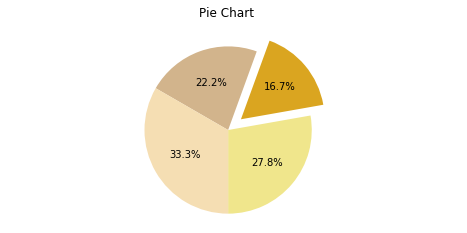

In [84]:
data = np.array([5,3,4,6])
labels = ['bats','cats','gnats','rats']
explode = (0, 0.2, 0, 0) # explode cats
colors = ['khaki','goldenrod','tan','wheat']
fig, ax = plt.subplots(figsize=(8,3.5))
ax.pie(data, explode=explode, autopct='%0.1f%%', startangle=270, colors=colors)
ax.axis('equal') # keep it a circle
fig.suptitle('Pie Chart')
fig.savefig('pie_chart.png',dpi=125)

# Polar - using ax.plot()

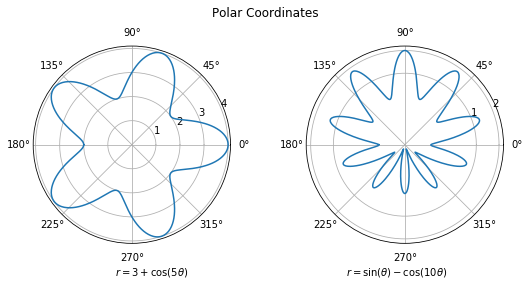

In [85]:
theta = np.linspace(-np.pi, np.pi, 800)
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1, polar=True)
r = 3 + np.cos(5*theta)
ax.plot(theta, r)
ax.set_yticks([1,2,3,4])
ax = fig.add_subplot(1,2,2, polar=True)
r = (np.sin(theta)) - (np.cos(10*theta))
ax.plot(theta, r)
ax.set_yticks([1,2])
fig.suptitle('Polar Coordinates')
fig.text(x=0.24, y=0.05, s=r'$r=3 + \cos(5 \theta)$')
fig.text(x=0.64, y=0.05, s=r'$r = \sin(\theta) - \cos(10 \theta)$')
fig.tight_layout(pad=3)
fig.savefig('polar_plot.png',dpi=125)

# Plot spines
## Hiding the top and right spines

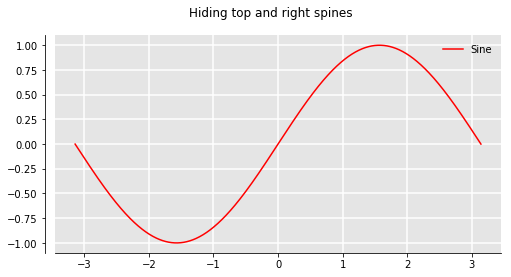

In [89]:
x = np.linspace(-np.pi, np.pi, 800)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, label='Sine', color='red')
ax.set_facecolor('#e5e5e5')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('outward',10))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(b=True, which='both', color='white',linestyle='-', linewidth=1.5)
ax.set_axisbelow(True)
ax.legend(loc='best',frameon=False)
fig.suptitle('Hiding top and right spines')
fig.savefig('plot_spines.png',dpi=125)

## Spines in the middle

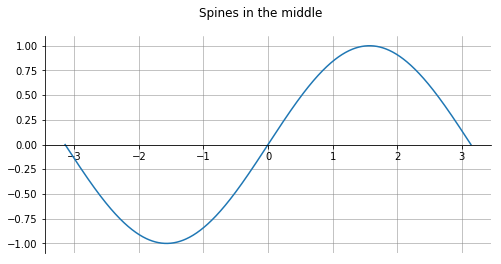

In [88]:
x = np.linspace(-np.pi, np.pi, 800)
y = np.sin(x)
fig, ax= plt.subplots(figsize=(8,4))
ax.plot(x, y, label='Sine')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.grid(b=True, which='both',color='#888888',linestyle='-', linewidth=0.5)
fig.suptitle('Spines in the middle')
fig.savefig('middle_spines.png',dpi=125)